# SPU 1 Kawengan dengan Menggunakan FLIR

In [95]:
# Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers


import seaborn as sns
from sklearn.model_selection import train_test_split


## 1. Data Preparation


In [96]:
df1 = pd.read_csv("SP1_new.csv")

# Konversi string ke format datetime
df1["Time"] = pd.to_datetime(df1["Time"].str.strip(), format="%H:%M:%S.%f")
start_time = df1["Time"].iloc[0]
df1["Time"] = (df1["Time"] - start_time).dt.total_seconds()

df1

,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),Power Supply Voltage,Power Supply Frequency,Electric Power (kWh),Cooling Fin Temperature,Peak Voltage Output Frequency,Motor q-Axis Current during Fault,Fin Temperature
0,0.000,48.18,48.18,82.05,371.1,42.7,588.0,48.18,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
1,0.155,48.17,48.17,80.86,371.0,43.7,589.0,48.17,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
2,0.297,48.16,48.16,82.14,370.9,40.8,590.0,48.14,199.8,0.0,400.0,50.0,938.0,36.0,2.23,-11.5,32.0
3,0.434,48.14,48.14,82.67,370.9,43.7,593.0,48.15,199.8,0.0,400.0,50.0,938.0,36.0,2.23,-11.5,32.0
4,0.572,48.17,48.17,86.77,371.1,45.7,586.0,48.16,199.8,0.0,399.0,50.0,938.0,36.0,2.23,-11.5,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,1915.752,48.17,48.17,82.27,371.2,45.9,585.0,48.17,199.8,0.0,397.0,50.0,962.0,37.0,2.23,-11.5,32.0
1972,1917.111,48.17,48.17,85.09,371.2,44.5,591.0,48.17,199.8,0.0,399.0,50.0,962.0,37.0,2.23,-11.5,32.0
1973,1918.540,48.16,48.16,86.99,371.3,45.8,590.0,48.16,199.8,0.0,398.0,49.9,962.0,37.0,2.23,-11.5,32.0
1974,1919.901,48.17,48.17,81.44,371.1,46.3,584.0,48.17,199.8,0.0,398.0,50.0,962.0,37.0,2.23,-11.5,32.0


In [97]:
# Kolom baru
df1['RPM Ref'] = df1['Frequency Reference'] * 120 / 2
df1['RPM Out'] = df1['Output Frequency'] * 120 / 2
df1['Power Factor'] = (df1['Output Power'] * 1000) / (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current'])
df1['Slip (%)'] = (abs(df1['RPM Out'] - df1['RPM Ref']) / df1['RPM Out']) * 100
df1['Daya Semu (kVA)'] = (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current']) / 1000
df1['Efficiency (%)'] = 93.5
df1['Daya Output Motor (kW)'] = (np.sqrt(3) * df1['Output Voltage'] * df1['Output Current'] * df1['Efficiency (%)'] / 100 * df1['Power Factor']) / 1000
df1['Torque (Nm)'] = 9555*df1['Daya Output Motor (kW)']/df1['RPM Out']
df1

,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),...,Motor q-Axis Current during Fault,Fin Temperature,RPM Ref,RPM Out,Power Factor,Slip (%),Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm)
0,0.000,48.18,48.18,82.05,371.1,42.7,588.0,48.18,199.8,0.0,...,-11.5,32.0,2890.8,2890.8,0.809651,0.0,52.738791,93.5,39.9245,131.962985
1,0.155,48.17,48.17,80.86,371.0,43.7,589.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.841033,0.0,51.959896,93.5,40.8595,135.081490
2,0.297,48.16,48.16,82.14,370.9,40.8,590.0,48.14,199.8,0.0,...,-11.5,32.0,2889.6,2889.6,0.773193,0.0,52.768185,93.5,38.1480,126.143459
3,0.434,48.14,48.14,82.67,370.9,43.7,593.0,48.15,199.8,0.0,...,-11.5,32.0,2888.4,2888.4,0.822841,0.0,53.108667,93.5,40.8595,135.165670
4,0.572,48.17,48.17,86.77,371.1,45.7,586.0,48.16,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.819398,0.0,55.772637,93.5,42.7295,141.263709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971,1915.752,48.17,48.17,82.27,371.2,45.9,585.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.867766,0.0,52.894448,93.5,42.9165,141.881931
1972,1917.111,48.17,48.17,85.09,371.2,44.5,591.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.813416,0.0,54.707531,93.5,41.6075,137.554378
1973,1918.540,48.16,48.16,86.99,371.3,45.8,590.0,48.16,199.8,0.0,...,-11.5,32.0,2889.6,2889.6,0.818673,0.0,55.944179,93.5,42.8230,141.602217
1974,1919.901,48.17,48.17,81.44,371.1,46.3,584.0,48.17,199.8,0.0,...,-11.5,32.0,2890.2,2890.2,0.884487,0.0,52.346705,93.5,43.2905,143.118375


In [98]:
df1.describe()

,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),...,Motor q-Axis Current during Fault,Fin Temperature,RPM Ref,RPM Out,Power Factor,Slip (%),Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm)
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03,1976.0,...,1976.0,1976.0,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.0,1976.000000,1976.000000
mean,765.451130,48.165648,48.165385,83.267814,371.092814,44.138259,587.408401,48.166058,1.998000e+02,0.0,...,-11.5,32.0,2889.938866,2889.923077,0.824931,0.004644,53.520800,93.5,41.269272,136.449153
std,587.705363,0.009017,0.008654,2.098744,0.112639,2.054883,2.602960,0.008292,7.078797e-12,0.0,...,0.0,0.0,0.541005,0.519234,0.038209,0.008679,1.360172,0.0,1.921316,6.349999
min,0.000000,48.130000,48.140000,79.230000,370.700000,37.000000,581.000000,48.140000,1.998000e+02,0.0,...,-11.5,32.0,2887.800000,2888.400000,0.709336,0.000000,50.871304,93.5,34.595000,114.442330
25%,228.653000,48.160000,48.160000,81.700000,371.000000,43.000000,585.000000,48.160000,1.998000e+02,0.0,...,-11.5,32.0,2889.600000,2889.600000,0.803529,0.000000,52.499672,93.5,40.205000,132.972923
50%,667.579000,48.170000,48.170000,82.800000,371.100000,44.700000,587.000000,48.170000,1.998000e+02,0.0,...,-11.5,32.0,2890.200000,2890.200000,0.824706,0.000000,53.220864,93.5,41.794500,138.201290
75%,1262.324500,48.170000,48.170000,84.740000,371.200000,45.600000,589.000000,48.170000,1.998000e+02,0.0,...,-11.5,32.0,2890.200000,2890.200000,0.855075,0.000000,54.483197,93.5,42.636000,140.954598
max,1921.347000,48.190000,48.190000,88.310000,371.400000,48.100000,595.000000,48.190000,1.998000e+02,0.0,...,-11.5,32.0,2891.400000,2891.400000,0.903274,0.041537,56.777789,93.5,44.973500,148.682372


## 2. Exploratory Data Analysis

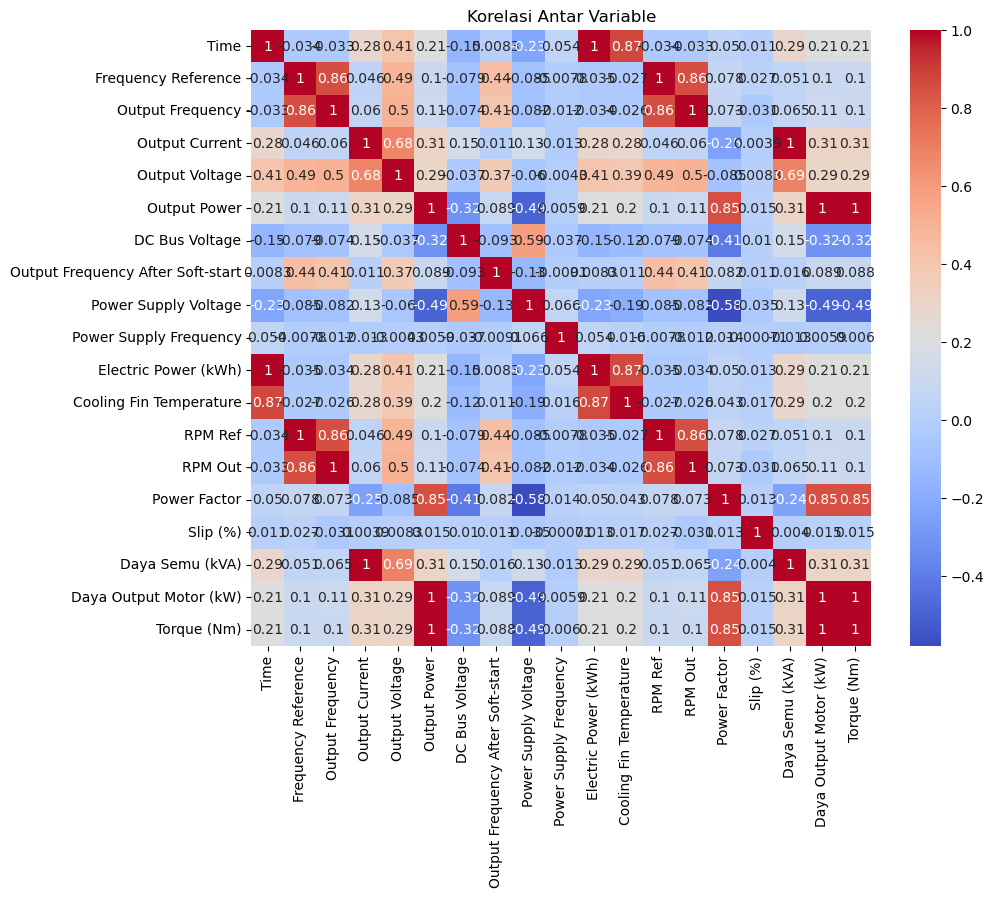

In [99]:
# Menghapus kolom yang memiliki nilai konstan dan yang hanya berisi 0 dan 1
filtered_cols = [col for col in df1.columns
                 if df1[col].nunique() > 1 and not set(df1[col].unique()).issubset({0, 1})]

filtered_df1 = df1[filtered_cols]

# Menghitung korelasi dan menampilkan heatmap
corr = filtered_df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variable')
plt.show()

In [100]:
# # Hubungan Antara Waktu dengan Variable Lain
# for col in df1.columns:
#     if col != "Time":
#         plt.figure(figsize=(10, 6))
#         plt.plot(df1.index, df1[col], label=col, color='green')
#         plt.xlabel("Time")
#         plt.ylabel(col)
#         plt.title(f"Hubungan Antara {col} dengan Waktu")
#         plt.show()

Text(0.5, 1.0, 'Hubungan Antara Output Frequency dengan Frequency Reference')

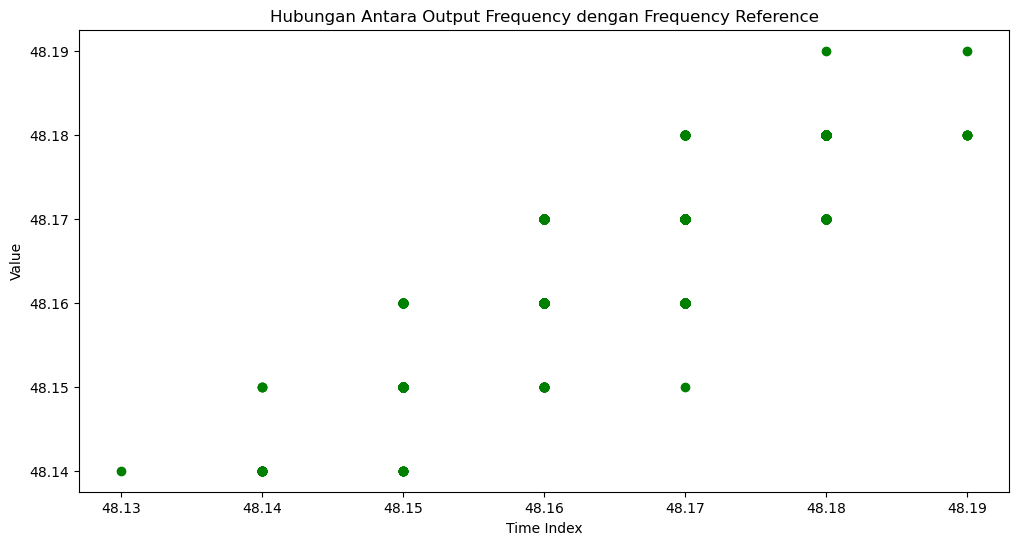

In [101]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.scatter(df1['Frequency Reference'], df1['Output Frequency'], label='Output Frequency (Hz)', color='green')

plt.xlabel('Time Index')
plt.ylabel('Value')
plt.title('Hubungan Antara Output Frequency dengan Frequency Reference')

Text(0.5, 1.0, 'Hubungan Antara Output Frequency, Current, and Power terhadap Waktu')

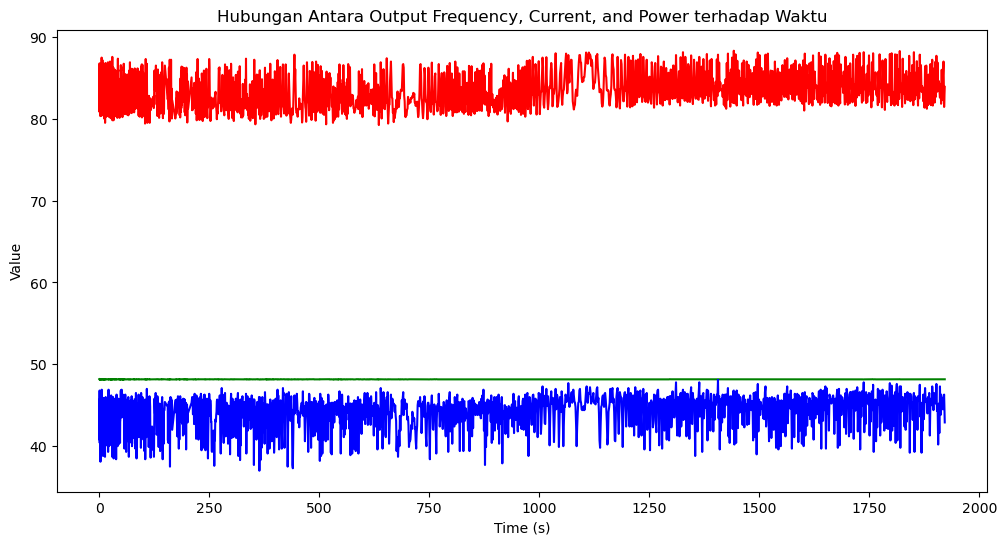

In [102]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.plot(df1['Time'], df1['Output Frequency'], label='Output Frequency (Hz)', color='green')
plt.plot(df1['Time'], df1['Output Current'], label='Output Frequency (Hz)', color='red')
plt.plot(df1['Time'], df1['Output Power'], label='Output Frequency (Hz)', color='blue')

plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('Hubungan Antara Output Frequency, Current, and Power terhadap Waktu')

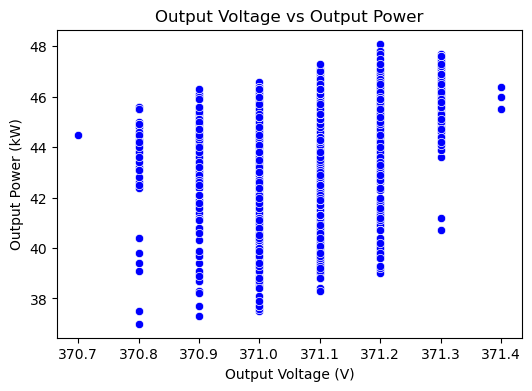

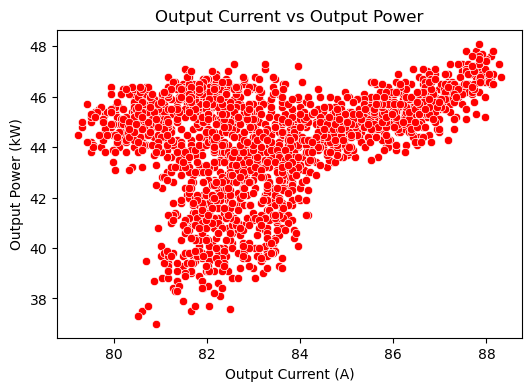

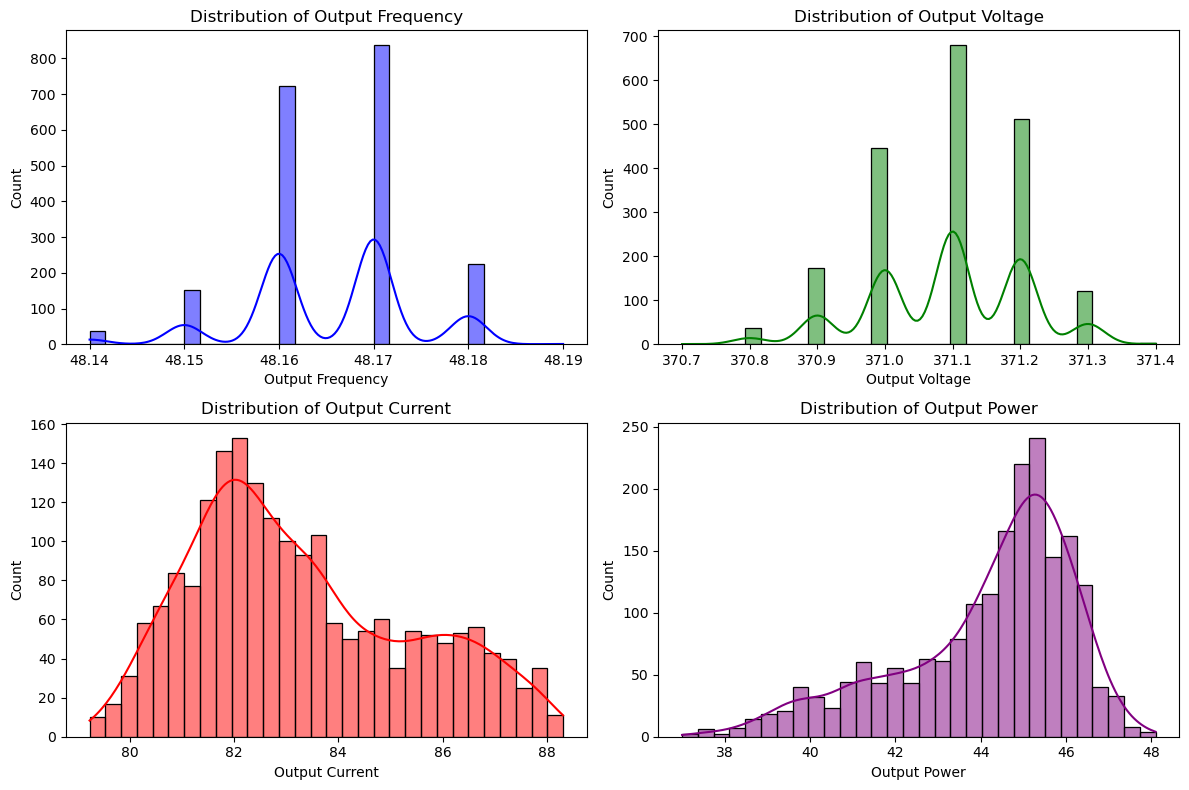

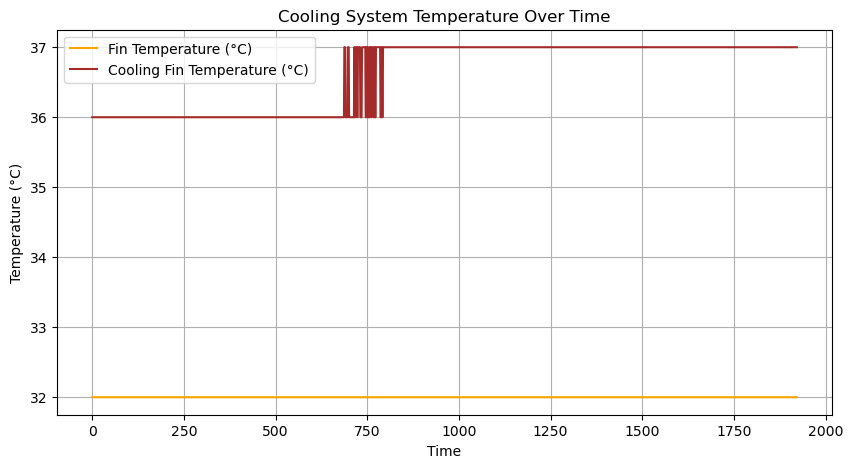

In [103]:
# 1. Scatter Plot: Output Voltage vs Output Power
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df1["Output Voltage"], y=df1["Output Power"], color="blue")
plt.xlabel("Output Voltage (V)")
plt.ylabel("Output Power (kW)")
plt.title("Output Voltage vs Output Power")
plt.show()

# 2. Scatter Plot: Output Current vs Output Power
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df1["Output Current"], y=df1["Output Power"], color="red")
plt.xlabel("Output Current (A)")
plt.ylabel("Output Power (kW)")
plt.title("Output Current vs Output Power")
plt.show()

# 3. Histogram Distribusi Data
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.histplot(df1["Output Frequency"], bins=30, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribution of Output Frequency")

sns.histplot(df1["Output Voltage"], bins=30, kde=True, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Distribution of Output Voltage")

sns.histplot(df1["Output Current"], bins=30, kde=True, ax=axes[1, 0], color="red")
axes[1, 0].set_title("Distribution of Output Current")

sns.histplot(df1["Output Power"], bins=30, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribution of Output Power")

plt.tight_layout()
plt.show()

# 4. Analisis Suhu Pendingin terhadap Waktu
plt.figure(figsize=(10, 5))
plt.plot(df1["Time"], df1["Fin Temperature"], label="Fin Temperature (°C)", color="orange")
plt.plot(df1["Time"], df1["Cooling Fin Temperature"], label="Cooling Fin Temperature (°C)", color="brown")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Cooling System Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

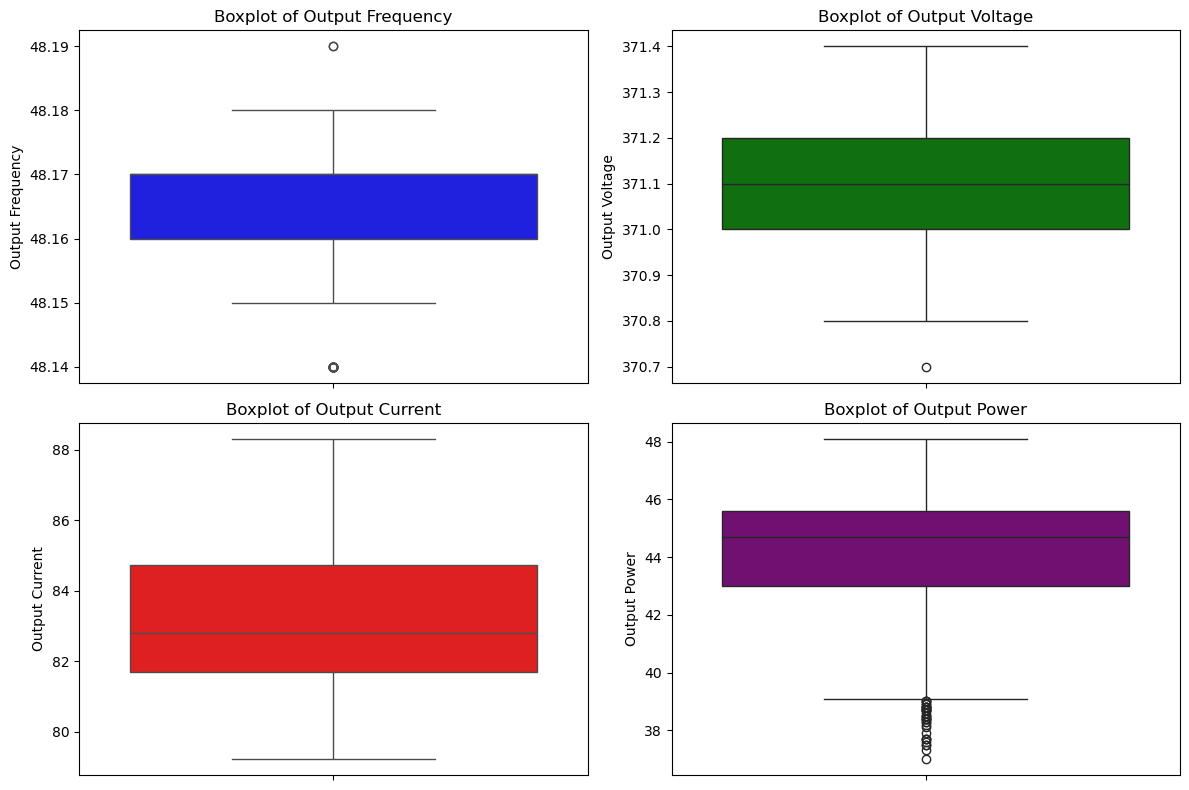

(0, 9)

In [104]:
# 1. Boxplot untuk melihat anomali dalam distribusi data utama
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(y=df1["Output Frequency"], ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Boxplot of Output Frequency")

sns.boxplot(y=df1["Output Voltage"], ax=axes[0, 1], color="green")
axes[0, 1].set_title("Boxplot of Output Voltage")

sns.boxplot(y=df1["Output Current"], ax=axes[1, 0], color="red")
axes[1, 0].set_title("Boxplot of Output Current")

sns.boxplot(y=df1["Output Power"], ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Boxplot of Output Power")

plt.tight_layout()
plt.show()

# 2. Deteksi Outlier menggunakan Z-score (mengambil threshold |Z| > 3)
def detect_outliers_zscore(data, column):
    mean = np.mean(data[column])
    std = np.std(data[column])
    z_scores = (data[column] - mean) / std
    outliers = data[np.abs(z_scores) > 3]
    return outliers

outliers_current = detect_outliers_zscore(df1, "Output Current")
outliers_power = detect_outliers_zscore(df1, "Output Power")

# 3. Perhitungan Efisiensi Motor
cos_phi = 0.93
df1["Input Power"] = np.sqrt(3) * df1["Output Voltage"] * df1["Output Current"] * cos_phi  # P_in
df1["Efficiency (%)"] = (df1["Output Power"] / df1["Input Power"]) * 100

# Menampilkan jumlah outlier yang ditemukan
len(outliers_current), len(outliers_power)


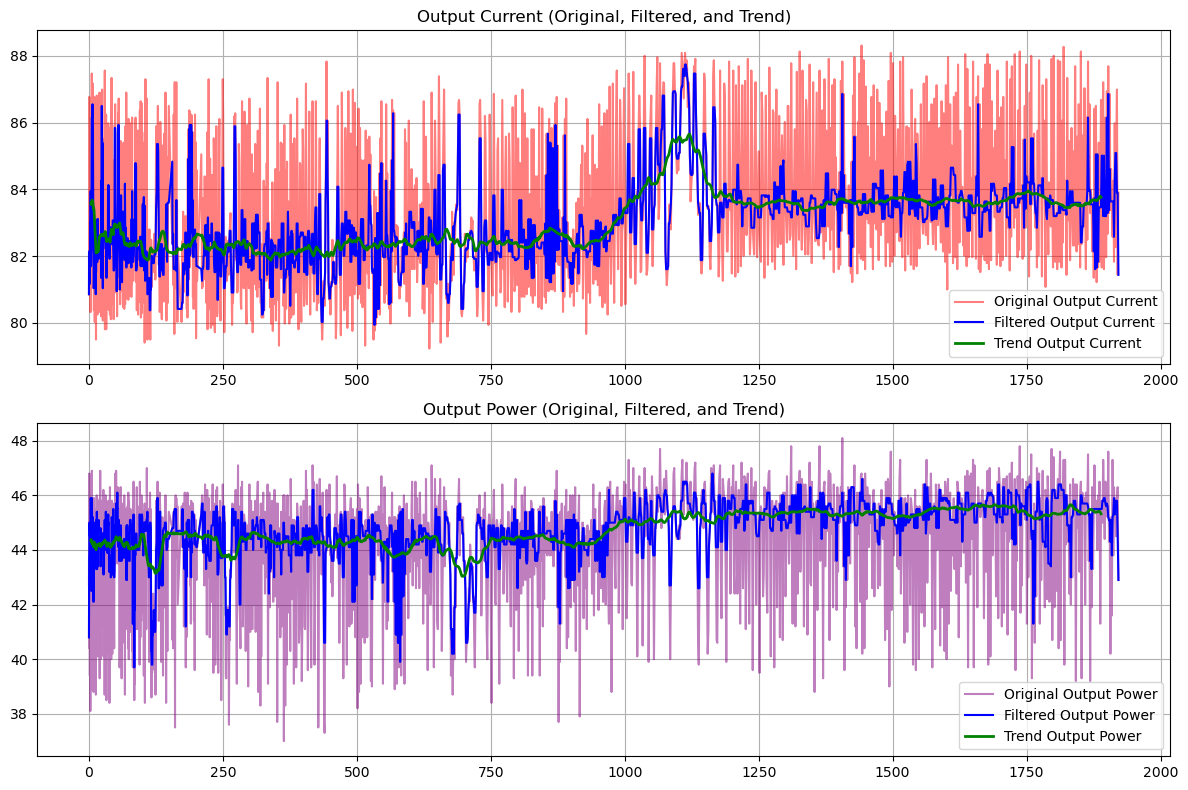

In [105]:
# Analisis Trend Jangka Panjang
from scipy.signal import medfilt

# 1. Filter Outlier dengan Median Filter
df1["Filtered Output Current"] = medfilt(df1["Output Current"], kernel_size=5)
df1["Filtered Output Power"] = medfilt(df1["Output Power"], kernel_size=5)

# 2. Deteksi Tren Jangka Panjang dengan Moving Average (Window 50)
df1["Trend Output Current"] = df1["Filtered Output Current"].rolling(window=50, center=True).mean()
df1["Trend Output Power"] = df1["Filtered Output Power"].rolling(window=50, center=True).mean()

# 3. Plot Data Sebelum dan Sesudah Filtering untuk Perbandingan
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(df1["Time"], df1["Output Current"], label="Original Output Current", alpha=0.5, color="red")
axes[0].plot(df1["Time"], df1["Filtered Output Current"], label="Filtered Output Current", color="blue")
axes[0].plot(df1["Time"], df1["Trend Output Current"], label="Trend Output Current", color="green", linewidth=2)
axes[0].set_title("Output Current (Original, Filtered, and Trend)")
axes[0].legend()
axes[0].grid()

axes[1].plot(df1["Time"], df1["Output Power"], label="Original Output Power", alpha=0.5, color="purple")
axes[1].plot(df1["Time"], df1["Filtered Output Power"], label="Filtered Output Power", color="blue")
axes[1].plot(df1["Time"], df1["Trend Output Power"], label="Trend Output Power", color="green", linewidth=2)
axes[1].set_title("Output Power (Original, Filtered, and Trend)")
axes[1].legend()
axes[1].grid()

plt.tight_layout()
plt.show()


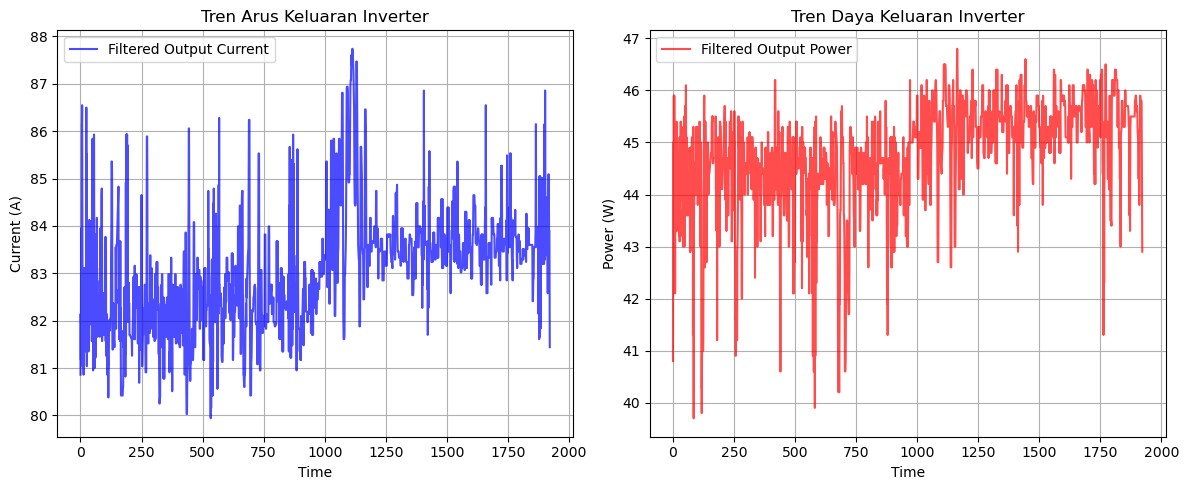

In [106]:
# Plot hubungan antara arus dan daya keluaran inverter dalam jangka waktu tertentu

plt.figure(figsize=(12, 5))

# Plot tren Output Current
plt.subplot(1, 2, 1)
plt.plot(df1["Time"], df1["Filtered Output Current"], label="Filtered Output Current", color="blue", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Current (A)")
plt.title("Tren Arus Keluaran Inverter")
plt.legend()
plt.grid()

# Plot tren Output Power
plt.subplot(1, 2, 2)
plt.plot(df1["Time"], df1["Filtered Output Power"], label="Filtered Output Power", color="red", alpha=0.7)
plt.xlabel("Time")
plt.ylabel("Power (W)")
plt.title("Tren Daya Keluaran Inverter")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


## 3. FFT

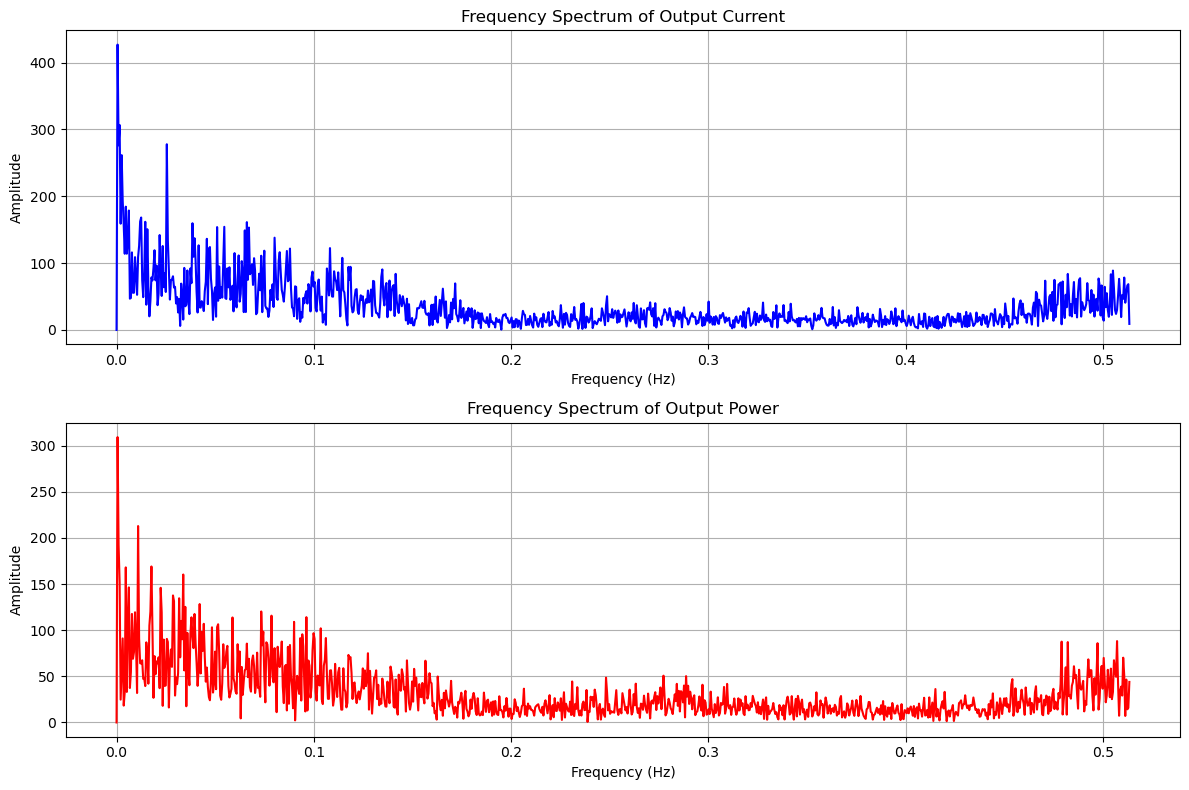

In [149]:
# 1. Analisis Pola Siklus dengan FFT (Fast Fourier Transform)
from scipy.fftpack import fft, fftfreq
from scipy.signal import detrend

# Menghilangkan NaN dari data yang telah difilter
filtered_current = detrend(df1["Filtered Output Current"].dropna().values)
filtered_power = detrend(df1["Filtered Output Power"].dropna().values)

# Sampling rate berdasarkan selisih waktu rata-rata antar data
time_intervals = np.diff(df1["Time"].dropna())
sampling_rate = 1 / np.mean(time_intervals)  # Hz

# FFT untuk Output Current
N = len(filtered_current)
freqs_current = fftfreq(N, d=1/sampling_rate)
fft_current = np.abs(fft(filtered_current))

# FFT untuk Output Power
N = len(filtered_power)
freqs_power = fftfreq(N, d=1/sampling_rate)
fft_power = np.abs(fft(filtered_power))

# 2. Visualisasi Spektrum Frekuensi
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

axes[0].plot(freqs_current[:N // 2], fft_current[:N // 2], color="blue")
axes[0].set_title("Frequency Spectrum of Output Current")
axes[0].set_xlabel("Frequency (Hz)")
axes[0].set_ylabel("Amplitude")
axes[0].grid()

axes[1].plot(freqs_power[:N // 2], fft_power[:N // 2], color="red")
axes[1].set_title("Frequency Spectrum of Output Power")
axes[1].set_xlabel("Frequency (Hz)")
axes[1].set_ylabel("Amplitude")
axes[1].grid()

plt.tight_layout()
plt.show()


In [108]:
# 1. Menghitung THD (Total Harmonic Distortion) untuk Output Current dan Output Power
def calculate_thd(signal_fft, fundamental_freq, freqs):
    """Menghitung Total Harmonic Distortion (THD) berdasarkan FFT"""
    fundamental_index = np.argmin(np.abs(freqs - fundamental_freq))
    fundamental_amplitude = signal_fft[fundamental_index]
    
    if fundamental_amplitude == 0:
        return np.nan  # Hindari pembagian nol
    
    harmonic_power = np.sum(signal_fft[fundamental_index+1:] ** 2)  # Jumlah daya harmonik di atas fundamental
    thd = np.sqrt(harmonic_power) / fundamental_amplitude
    return thd * 100  # Dalam persen

# Asumsi fundamental frequency dari suplai (50 Hz)
fundamental_freq = 50  

# Menghitung THD untuk Output Current dan Output Power
thd_current = calculate_thd(fft_current, fundamental_freq, freqs_current)
thd_power = calculate_thd(fft_power, fundamental_freq, freqs_power)

thd_current, thd_power


(17703.900679860268, 3056.9286268452606)

## 4. Prediksi Konsumsi Daya

In [151]:
# Import library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# === Ambil variable (Fitur & Target) ===
features = ['Output Frequency', 'Output Power', 'Output Voltage', 'Fin Temperature', 'Electric Power (kWh)', 'Power Factor', 'Slip (%)', 'Daya Semu (kVA)', 'Daya Output Motor (kW)']
target = ['Output Current']

x = df1[features].values
y = df1[target].values

# === Normalisasi data ===
scaler = StandardScaler()
x = scaler.fit_transform(x)

# === Split Data: 80% Train, 20% Test ===
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# === Model ANN dengan 3 Hidden Layer ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),  # Normalisasi batch agar lebih stabil
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(16, activation='relu'),
    
    Dense(1)  # Output 1 nilai (Electric Power)
])

# === Compile Model ===
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# === Tampilkan Arsitektur Model ===
model.summary()

# === Training Model ===
history = model.fit(x_train, y_train, 
                    epochs=300, batch_size=32, 
                    validation_data=(x_test, y_test))

# === Simpan Scaler untuk Prediksi ===
import joblib
joblib.dump(scaler, "scaler.pkl")


c:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,649 (14.25 KB)

 Trainable params: 3,457 (13.50 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6801.1533 - mae: 82.4216 - val_loss: 6696.7695 - val_mae: 81.7975
Epoch 2/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6334.4092 - mae: 79.4529 - val_loss: 6204.9097 - val_mae: 78.6796
Epoch 3/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5594.2725 - mae: 74.4672 - val_loss: 5148.6616 - val_mae: 71.5039
Epoch 4/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4340.4678 - mae: 65.0628 - val_loss: 3402.9019 - val_mae: 57.2227
Epoch 5/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2772.0571 - mae: 50.7512 - val_loss: 1716.0411 - val_mae: 37.6881
Epoch 6/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1498.2313 - mae: 34.4095 - val_loss: 811.0602 - val_mae: 20.3088
Epoch 7/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 871.7463 - mae: 23.8220 - val_loss: 463.8911 - val_mae: 15.1811
Epoch 8/300
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 646.8706 - mae: 20.1539 - val_loss: 308.4620 - val_mae: 11.9676
Epoch

['scaler.pkl']

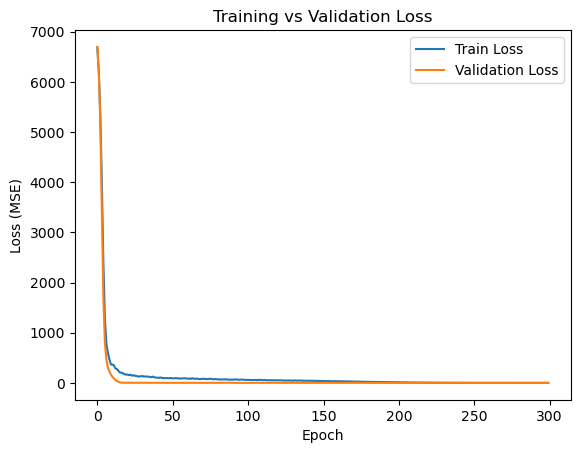

In [152]:
# Plot loss function
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


## 5. Evaluation and Testing

In [153]:
x_current = pd.read_csv('yaskawa3_test.csv')
x_current['Time'] = pd.to_timedelta(x_current['Time']).dt.total_seconds()
x_current.dropna()

# Kolom baru
x_current['RPM Ref'] = x_current['Frequency Reference'] * 120 / 2
x_current['RPM Out'] = x_current['Output Frequency'] * 120 / 2
x_current['Power Factor'] = (x_current['Output Power'] * 1000) / (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current'])
x_current['Slip (%)'] = (abs(x_current['RPM Out'] - x_current['RPM Ref']) / x_current['RPM Out']) * 100
x_current['Daya Semu (kVA)'] = (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current']) / 1000
x_current['Efficiency (%)'] = 93.5
x_current['Daya Output Motor (kW)'] = (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current'] * x_current['Efficiency (%)'] / 100 * x_current['Power Factor']) / 1000
x_current['Torque (Nm)'] = 9555*x_current['Daya Output Motor (kW)']/x_current['RPM Out']
x_current


,Time,Frequency Reference,Output Frequency,Output Current,Output Power,Output Voltage,Minor Fault,Major Fault,During Run,Fault Output,...,Cooling Fan Operation Time,Electric Power (kWh),RPM Ref,RPM Out,Power Factor,Slip (%),Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm)
0,0.188,48.08,48.08,82.54,42.4,370.4,0.0,0.0,1.0,0.0,...,1388.0,627.0,2884.8,2884.8,0.800700,0.000000,52.953671,93.5,39.6440,131.308382
1,0.336,48.08,48.08,82.71,38.1,370.3,0.0,0.0,1.0,0.0,...,1388.0,627.0,2884.8,2884.8,0.718212,0.000000,53.048409,93.5,35.6235,117.991730
2,0.487,48.09,48.08,83.20,42.5,370.5,0.0,0.0,1.0,0.0,...,1388.0,627.0,2885.4,2884.8,0.796007,0.020799,53.391505,93.5,39.7375,131.618071
3,0.632,48.08,48.08,83.33,44.4,370.5,0.0,0.0,1.0,0.0,...,1388.0,627.0,2884.8,2884.8,0.830296,0.000000,53.474930,93.5,41.5140,137.502173
4,0.775,48.07,48.08,85.93,47.5,370.4,0.0,0.0,1.0,0.0,...,1388.0,627.0,2884.2,2884.8,0.861623,0.020799,55.128531,93.5,44.4125,147.102550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,637.462,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,93.5,NaN,NaN
1255,637.808,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,93.5,NaN,NaN
1256,638.133,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,93.5,NaN,NaN
1257,638.463,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,93.5,NaN,NaN


In [154]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# === Baca Data ===
x_current = pd.read_csv('yaskawa3_test.csv')

# === Konversi Waktu ke Detik ===
x_current['Time'] = pd.to_timedelta(x_current['Time']).dt.total_seconds()

# === Menambahkan Kolom Baru ===
x_current['RPM Ref'] = x_current['Frequency Reference'] * 120 / 2
x_current['RPM Out'] = x_current['Output Frequency'] * 120 / 2
x_current['Power Factor'] = (x_current['Output Power'] * 1000) / (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current'])

# Hindari pembagian dengan 0 pada perhitungan Slip
x_current['Slip (%)'] = np.where(
    x_current['RPM Out'] == 0, 
    0,  # Jika RPM Out = 0, buat Slip = 0 untuk menghindari NaN atau Inf
    (abs(x_current['RPM Out'] - x_current['RPM Ref']) / x_current['RPM Out']) * 100
)

x_current['Daya Semu (kVA)'] = (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current']) / 1000
x_current['Efficiency (%)'] = 93.5  # Asumsi nilai tetap
x_current['Daya Output Motor (kW)'] = (np.sqrt(3) * x_current['Output Voltage'] * x_current['Output Current'] * x_current['Efficiency (%)'] / 100 * x_current['Power Factor']) / 1000

# Hindari pembagian dengan 0 pada perhitungan Torque
x_current['Torque (Nm)'] = np.where(
    x_current['RPM Out'] == 0, 
    0,  # Jika RPM Out = 0, Torque = 0 untuk menghindari NaN atau Inf
    9555 * x_current['Daya Output Motor (kW)'] / x_current['RPM Out']
)

# === Pastikan Tidak Ada NaN atau Inf ===
x_current.replace([np.inf, -np.inf], np.nan, inplace=True)  # Ganti Inf dengan NaN
x_current.dropna(inplace=True)  # Hapus baris yang mengandung NaN

# === Pastikan Semua Data Bertipe Float64 ===
features = ['Output Frequency', 'Output Power', 'Output Voltage', 'Fin Temperature', 'Electric Power (kWh)', 'Power Factor', 'Slip (%)', 'Daya Semu (kVA)', 'Daya Output Motor (kW)']

x_current[features] = x_current[features].astype(np.float64)

# === Standardisasi Data dengan Fit Sebelum Transform ===
scaler = StandardScaler()
scaler.fit(x_current[features])  # Fitting scaler ke data sebelum transform
x_current[features] = scaler.transform(x_current[features])  # Sekarang transformasi bisa dilakukan

# === Prediksi Model ===
x_current['Predicted'] = np.nan

x_current.loc[:100, 'Predicted'] = x_current.head(100).apply(
    lambda row: model.predict(np.array([row[features]]))[0][0], axis=1
)

# === Hitung Error ===
x_current['error (%)'] = abs(x_current['Output Current'] - x_current['Predicted']) * 100 / x_current['Output Current']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

In [155]:
x_current[features] = scaler.inverse_transform(x_current[features])
x_current

,Time,Frequency Reference,Output Frequency,Output Current,Output Power,Output Voltage,Minor Fault,Major Fault,During Run,Fault Output,...,RPM Ref,RPM Out,Power Factor,Slip (%),Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm),Predicted,error (%)
0,0.188,48.08,48.08,82.54,42.4,370.4,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.800700,0.000000,52.953671,93.5,39.6440,131.308382,82.959702,0.508483
1,0.336,48.08,48.08,82.71,38.1,370.3,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.718212,0.000000,53.048409,93.5,35.6235,117.991730,83.109642,0.483185
2,0.487,48.09,48.08,83.20,42.5,370.5,0.0,0.0,1.0,0.0,...,2885.4,2884.8,0.796007,0.020799,53.391505,93.5,39.7375,131.618071,83.692513,0.591962
3,0.632,48.08,48.08,83.33,44.4,370.5,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.830296,0.000000,53.474930,93.5,41.5140,137.502173,83.746010,0.499232
4,0.775,48.07,48.08,85.93,47.5,370.4,0.0,0.0,1.0,0.0,...,2884.2,2884.8,0.861623,0.020799,55.128531,93.5,44.4125,147.102550,86.053970,0.144269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,477.579,48.08,48.08,82.98,44.3,370.5,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.831920,0.000000,53.250326,93.5,41.4205,137.192484,NaN,NaN
1229,478.158,48.08,48.08,80.42,44.2,370.4,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.856696,0.000000,51.593581,93.5,41.3270,136.882794,NaN,NaN
1230,478.774,48.09,48.08,82.93,40.8,370.4,0.0,0.0,1.0,0.0,...,2885.4,2884.8,0.766861,0.020799,53.203876,93.5,38.1480,126.353349,NaN,NaN
1231,479.267,48.08,48.08,82.89,45.1,370.4,0.0,0.0,1.0,0.0,...,2884.8,2884.8,0.848092,0.000000,53.178214,93.5,42.1685,139.670001,NaN,NaN


Text(0.5, 1.0, 'Hubungan Antara Arus')

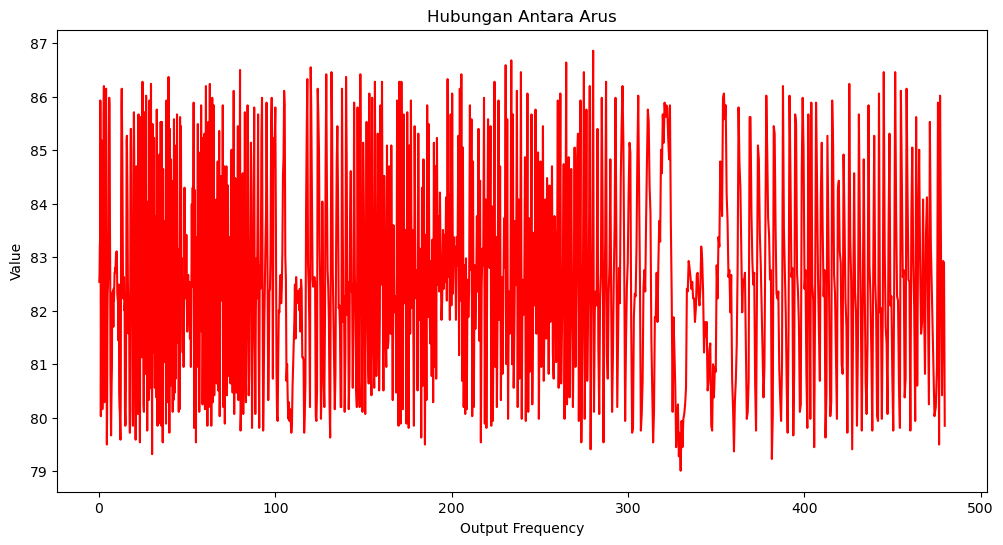

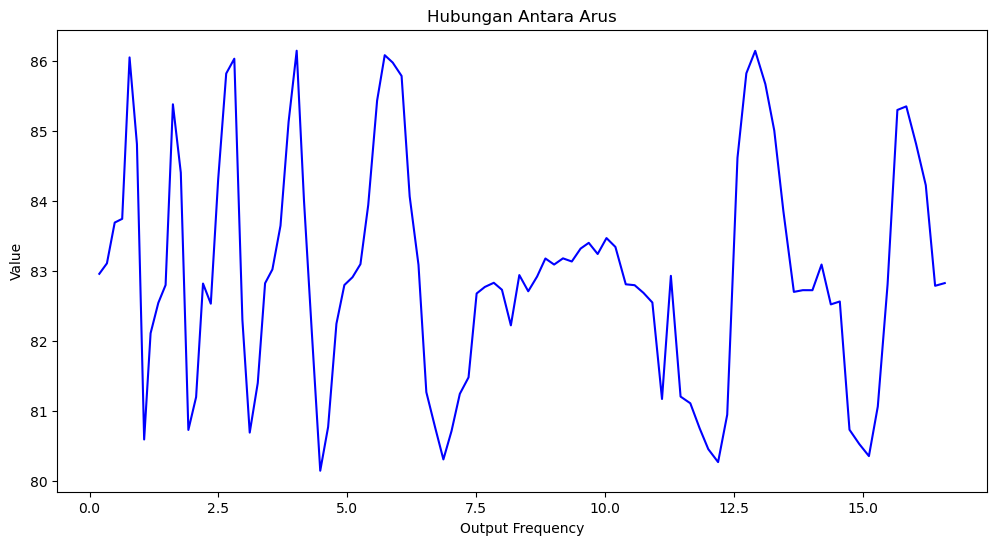

In [156]:
# Plot Output Frequency, Output Current, dan Output Power terhadap waktu
plt.figure(figsize=(12,6))
plt.plot(x_current['Time'], x_current['Output Current'], label='Output Frequency (Hz)', color='red')

plt.xlabel('Output Frequency')
plt.ylabel('Value')
plt.title('Hubungan Antara Arus')


plt.figure(figsize=(12,6))
plt.plot(x_current['Time'], x_current['Predicted'], label='Output Frequency (Hz)', color='blue')

plt.xlabel('Output Frequency')
plt.ylabel('Value')
plt.title('Hubungan Antara Arus')

In [157]:
from sklearn.ensemble import IsolationForest

df_if = df1.dropna()

# Pilih fitur yang digunakan untuk deteksi anomali
features = ['Output Frequency', 'Cooling Fin Temperature', 'Output Power', 'Output Voltage', 'Fin Temperature', 'Electric Power (kWh)', 'Power Factor', 'Slip (%)', 'Daya Semu (kVA)', 'Daya Output Motor (kW)']
X_normal = df_if[features]

# Normalisasi data agar lebih stabil
scaler = StandardScaler()
X_normal_scaled = scaler.fit_transform(X_normal)

# Inisialisasi model Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)  # Asumsikan 5% data bisa jadi anomali
iso_forest.fit(X_normal_scaled)



IsolationForest(contamination=0.05, random_state=42)

In [158]:
# Normalisasi data baru agar sesuai dengan model
X_test_scaled = scaler.transform(df_if[features])

# Prediksi anomali (-1 = anomali, 1 = normal)
anomaly_labels = iso_forest.predict(X_test_scaled)

# Tambahkan hasil prediksi ke dataset
df_if["Anomaly"] = anomaly_labels

print(df_if["Anomaly"].value_counts())
df_if

Anomaly
 1    1830
-1      97
Name: count, dtype: int64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18036\4007995522.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_if["Anomaly"] = anomaly_labels


,Time,Frequency Reference,Output Frequency,Output Current,Output Voltage,Output Power,DC Bus Voltage,Output Frequency After Soft-start,Peak Voltage Current,Regenerative Power (kWh),...,Daya Semu (kVA),Efficiency (%),Daya Output Motor (kW),Torque (Nm),Input Power,Filtered Output Current,Filtered Output Power,Trend Output Current,Trend Output Power,Anomaly
25,3.757,48.18,48.18,80.78,371.1,44.6,587.0,48.17,199.8,0.0,...,51.922480,93.5,41.7010,137.834874,48287.906714,81.70,44.6,83.5776,44.356,1
26,3.922,48.14,48.14,81.70,370.8,42.6,585.0,48.15,199.8,0.0,...,52.471371,93.5,39.8310,131.763331,48798.374754,81.70,42.6,83.6042,44.382,-1
27,4.089,48.17,48.17,82.54,371.1,40.2,587.0,48.18,199.8,0.0,...,53.053745,93.5,37.5870,124.262606,49339.982919,81.83,42.6,83.6070,44.370,1
28,4.257,48.17,48.17,81.83,371.0,38.9,589.0,48.15,199.8,0.0,...,52.583209,93.5,36.3715,120.244164,48902.384578,82.54,42.5,83.6044,44.338,1
29,4.425,48.17,48.17,82.76,371.2,42.7,591.0,48.18,199.8,0.0,...,53.209488,93.5,39.9245,131.990380,49484.823485,82.76,42.5,83.5886,44.310,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947,1883.351,48.16,48.16,81.66,371.0,46.0,584.0,48.16,199.8,0.0,...,52.473969,93.5,43.0100,142.220567,48800.790964,81.83,45.5,83.7060,45.404,1
1948,1884.683,48.16,48.16,85.40,371.1,45.5,591.0,48.16,199.8,0.0,...,54.892050,93.5,42.5425,140.674691,51049.606751,83.46,45.5,83.7358,45.414,1
1949,1886.047,48.16,48.16,81.83,371.1,46.5,586.0,48.16,199.8,0.0,...,52.597383,93.5,43.4775,143.766443,48915.565814,83.46,45.5,83.7656,45.410,1
1950,1887.433,48.16,48.16,83.46,371.1,41.3,587.0,48.16,199.8,0.0,...,53.645088,93.5,38.6155,127.689335,49889.931844,83.46,45.5,83.7954,45.380,1


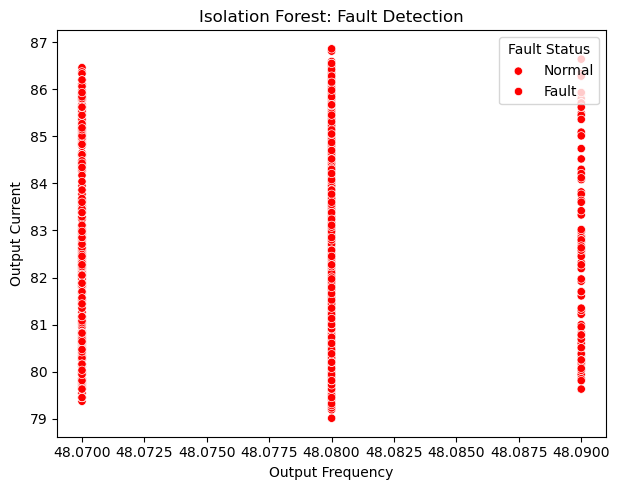

Isolation Forest Prediction
1    2403
Name: count, dtype: int64


In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load dataset pengujian (yaskawa_train.CSV)
df_test = pd.read_csv("yaskawa_train.CSV")

# Konversi waktu ke dalam format waktu seconds
df_test['Time'] = pd.to_timedelta(df_test['Time'])
df_test['Time'] = df_test['Time'].dt.total_seconds()
df_test.sort_index()

# Kolom baru
df_test['RPM Ref'] = df_test['Frequency Reference'] * 120 / 2
df_test['RPM Out'] = df_test['Output Frequency'] * 120 / 2
df_test['Power Factor'] = (df_test['Output Power'] * 1000) / (np.sqrt(3) * df_test['Output Voltage'] * df_test['Output Current'])
df_test['Slip (%)'] = (abs(df_test['RPM Out'] - df_test['RPM Ref']) / df_test['RPM Out']) * 100
df_test['Daya Semu (kVA)'] = (np.sqrt(3) * df_test['Output Voltage'] * df_test['Output Current']) / 1000
df_test['Efficiency (%)'] = 93.5
df_test['Daya Output Motor (kW)'] = (np.sqrt(3) * df_test['Output Voltage'] * df_test['Output Current'] * df_test['Efficiency (%)'] / 100 * df_test['Power Factor']) / 1000
df_test['Torque (Nm)'] = 9555*df_test['Daya Output Motor (kW)']/df_test['RPM Out']
df_test

# 🔹 Pastikan hanya mengambil fitur yang digunakan dalam model
features = ['Output Frequency', 'Cooling Fin Temperature', 'Output Power', 'Output Voltage', 'Fin Temperature', 'Electric Power (kWh)', 'Power Factor', 'Slip (%)', 'Daya Semu (kVA)', 'Daya Output Motor (kW)']
df_toTest = df_test[features]

# 🔹 Normalisasi data pengujian agar sesuai dengan model
df_toTest_scaled = scaler.transform(df_toTest)

# 🔹 Prediksi dengan Isolation Forest (-1 = Fault, 1 = Normal)
prediction_iso = iso_forest.predict(df_toTest_scaled)
df_test["Isolation Forest Prediction"] = [1 if p == -1 else 0 for p in prediction_iso]  # 1 = Fault, 0 = Normal

# 🔹 Visualisasi hasil prediksi
plt.figure(figsize=(12, 5))

# 🔹 Plot Isolation Forest
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_test["Output Frequency"], y=df_test["Output Current"], hue=df_test["Isolation Forest Prediction"], palette={0: "blue", 1: "red"})
plt.title("Isolation Forest: Fault Detection")
plt.xlabel("Output Frequency")
plt.ylabel("Output Current")
plt.legend(title="Fault Status", labels=["Normal", "Fault"], loc="upper right")

# 🔹 Tampilkan grafik
plt.tight_layout()
plt.show()

print(df_test["Isolation Forest Prediction"].value_counts())

VIF Data:
                 Feature           VIF
0   Frequency Reference  1.134139e+08
1      Output Frequency  1.186492e+08
2  Electric Power (kWh)  2.541858e+04
3        Output Voltage  4.503360e+07
4          Output Power  2.134792e+06
5        DC Bus Voltage  6.299655e+04
6          Power Factor  2.077287e+06
7              Slip (%)  1.307426e+00
8       Daya Semu (kVA)  2.166249e+06
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Mean Absolute Error (MAE): 1.7667359007207848
R² Score: -0.0037720968809833444


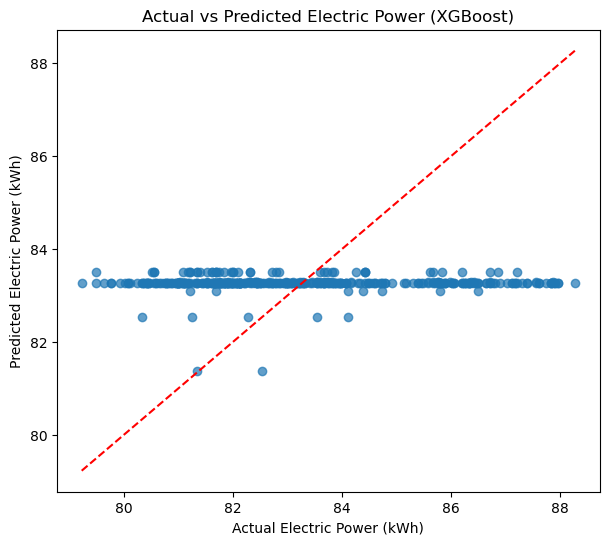

In [172]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# === 1. Load Data ===
df = df1

# === 2. Bersihkan Data ===
df = df.dropna()  # Hapus baris yang mengandung nilai NaN
df = df[df["Output Current"] > 0]  # Pastikan tidak ada nilai negatif atau nol pada target

# === 3. Pilih Fitur & Target ===
features = [
    "Frequency Reference", "Output Frequency", "Electric Power (kWh)",
    "Output Voltage", "Output Power", "DC Bus Voltage", "Power Factor", "Slip (%)", "Daya Semu (kVA)"
]  # Menghapus fitur yang tidak relevan

target = "Output Current"

# === 4. Cek Multikolinearitas (VIF) ===
X = df[features]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("VIF Data:\n", vif_data)

# Hapus fitur dengan VIF > 10 (Jika ada)
X = X.drop(columns=vif_data[vif_data["VIF"] > 10]["Feature"].tolist())

y = df[target]

# === 5. Split Data ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 6. Hyperparameter Tuning untuk XGBoost ===
param_grid = {
    'n_estimators': [200, 300, 500],  
    'learning_rate': [0.01, 0.05, 0.1],  
    'max_depth': [5, 7, 9],  
    'subsample': [0.7, 0.8, 1.0],  
    'colsample_bytree': [0.7, 0.8, 1.0]  
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

grid_search.fit(X_train, y_train)

# === 7. Evaluasi Model ===
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

# === 8. Plot Hasil Prediksi ===
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Electric Power (kWh)")
plt.ylabel("Predicted Electric Power (kWh)")
plt.title("Actual vs Predicted Electric Power (XGBoost)")
plt.show()
